**[Group 2] Ted talk**


### Pre-mount

In [ ]:
import gdown, os, zipfile, sys, json
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

Mounted at /content/drive


###Pre-Install

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip3 install -U transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.9 MB/s eta 0:00:00


# Step1: Web Scraping

## Internet artical-set environment

In [ ]:
!pip install chromedriver-autoinstaller
import chromedriver_autoinstaller

chromedriver_autoinstaller.install()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/90/chromedriver'

In [ ]:
!wget https://chromedriver.storage.googleapis.com/111.0.5563.64/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!chmod +x chromedriver
!mv chromedriver /usr/local/bin/

--2023-05-20 19:17:26--  https://chromedriver.storage.googleapis.com/111.0.5563.64/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 173.194.197.128, 2607:f8b0:4001:c1b::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7160988 (6.8M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   6.83M  --.-KB/s    in 0.1s    

2023-05-20 19:17:26 (67.8 MB/s) - ‘chromedriver_linux64.zip’ saved [7160988/7160988]

Archive:  chromedriver_linux64.zip
  inflating: chromedriver            
  inflating: LICENSE.chromedriver    


In [ ]:
!pip install opencv-python matplotlib beautifulsoup4 selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
import time
import cv2 #cv2讀圖片和影片
from matplotlib import pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.by import By #By用來指示尋找網頁中的哪樣東西
from bs4 import BeautifulSoup

## Define tool function

In [ ]:
def plot_webpage(wd):
  #確認網頁內容
  tmp_screenshot_p = "./tmp.jpg"
  wd.save_screenshot(tmp_screenshot_p)
  img = cv2.imread(tmp_screenshot_p)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cv2的影像是BGR
  plt.figure(figsize=(20,10))
  plt.imshow(img)
  plt.show()

def openweb(url):
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless') #啟用Chrome瀏覽器的無頭模式，即在背景下運行瀏覽器而不顯示圖形用戶界面。
  chrome_options.add_argument('--no-sandbox') #禁用Chrome瀏覽器的沙盒功能，以便在容器化環境（如Docker）中運行 Chrome。

  # url = "https://www.ted.com/talks/cristina_junqueira_and_elena_crescia_how_to_discover_your_business_s_competitive_advantage"

  wd = webdriver.Chrome('chromedriver', options=chrome_options)
  wd.set_window_size(1920,1080)
  wd.get(url)
  time.sleep(0.5)
  return wd

/usr/local/lib/python3.10/dist-packages/selenium/webdriver/remote/webdriver.py:889: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn(


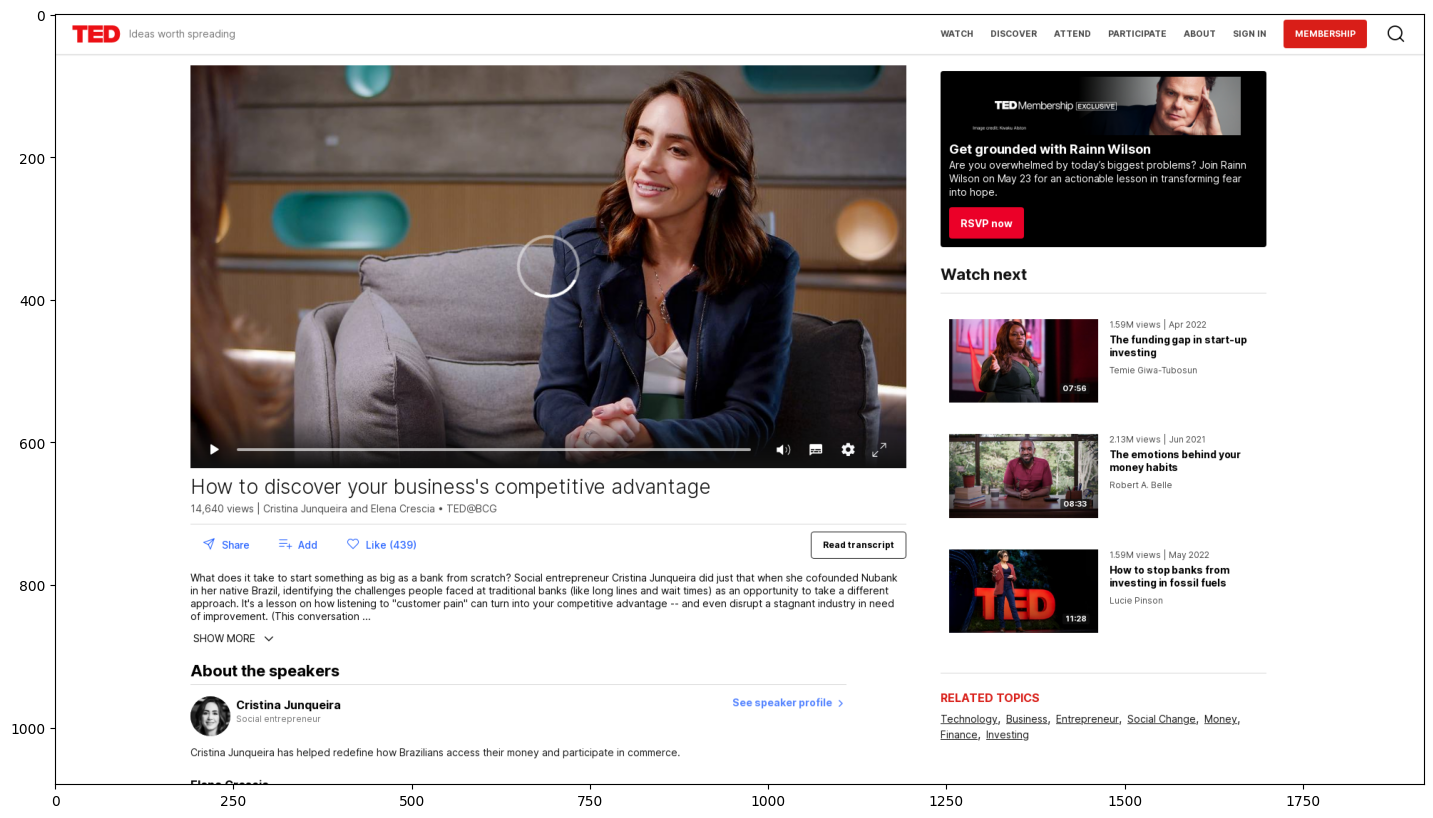

In [ ]:
wd = openweb("https://www.ted.com/talks/cristina_junqueira_and_elena_crescia_how_to_discover_your_business_s_competitive_advantage")
plot_webpage(wd)
wd.close()

## Parse topic list

In [ ]:
def find_topic_list(wd):
  """
  Return a dictionary which maps key(topic title) to value(dictionary A).
  Dictionary A is
  {
    "url": url,
    "date": date,
  }
  """

  # wd is webdriver
  result_body = wd.find_element(By.ID, value="browse-results")
  # topics = [_.find_element(By.TAG_NAME, "a") for _ in result_body.find_elements(By.TAG_NAME, value="div") ]
  topics = []
  release_times = []
  for div_position in result_body.find_elements(By.TAG_NAME, value="div"):
    if div_position.get_attribute("class")=="media__message":
      # parse tag a
      a_position = div_position.find_element(By.TAG_NAME, "a")
      topics.append(a_position)

      # parse Month
      span_positions = div_position.find_elements(By.TAG_NAME, "span")
      for _span in span_positions:
        if _span.get_attribute("class")=="meta__val":
          release_times.append(_span)
          break

  assert len(topics) == len(release_times)
  topic_urls = {}
  for i in range(len(topics)):
    _topic = topics[i]
    tmp_url = _topic.get_attribute("href")

    _date = release_times[i].text

    topic_name = _topic.text
    topic_urls[topic_name] = {
        "url": tmp_url,
        "date": _date,
    }
  return topic_urls

Make a test to check title and urls

In [ ]:
main_web = openweb("https://www.ted.com/talks")
topic_urls = find_topic_list(main_web)
main_web.close()
for i, k in enumerate(topic_urls.keys()):
  if i >=5:
    break
  print(k, topic_urls[k])

The incredible creativity of deepfakes — and the worrying future of AI {'url': 'https://www.ted.com/talks/tom_graham_the_incredible_creativity_of_deepfakes_and_the_worrying_future_of_ai', 'date': 'May 2023'}
Is it normal to talk to yourself? {'url': 'https://www.ted.com/talks/ted_ed_is_it_normal_to_talk_to_yourself', 'date': 'May 2023'}
What makes a "good college" — and why it matters {'url': 'https://www.ted.com/talks/cecilia_m_orphan_what_makes_a_good_college_and_why_it_matters', 'date': 'May 2023'}
Lessons from losing my mind {'url': 'https://www.ted.com/talks/andy_dunn_lessons_from_losing_my_mind', 'date': 'May 2023'}
The year without summer {'url': 'https://www.ted.com/talks/david_biello_the_year_without_summer', 'date': 'May 2023'}


## Parse text with specific topic & add timestamp

In [ ]:
def click_read_transcripts(wd):
  buttons = wd.find_elements(By.TAG_NAME, value="button")
  for b in buttons:
    if b.text =="Read transcript":
      b.click()
      time.sleep(0.5)
      return True
  return False

def parse_transcripts(wd):
  soup = BeautifulSoup(wd.page_source, parser="html.parser")
  transcripts_text_list = soup.find_all("div", {"class":"mx-auto mb-10 w-full"})
  #assert若後面不成立則報錯
  l = len(transcripts_text_list)
  s = "there are multiple {0:d} 'div' tag with class 'mx-auto mb-10 w-full'".format(l)
  assert l==1, s
  transcripts_body = transcripts_text_list[0]

  full_text = []
  timestamp_map = {} # key, value = time, transcripts
  timestamps = transcripts_body.find_all("div", {"class":"mb-6 w-full"})
  pre_t = None
  for timestamp in timestamps:
    t = timestamp.find("div",{"class":"text-sm"})

    if t==None:
      print("len of timestamps:", len(timestamps))
      raise ValueError("{} is None, previous time-stamp is{}".format(t, pre_t))
    transcripts = timestamp.find_all("span", {"class":"inline cursor-pointer hover:bg-red-300 css-82uonn"})
    text_part = []
    for transcript in transcripts:
      text_part.append(transcript.text)
    timestamp_map[t.text] = "".join(text_part)
    full_text.append("".join(text_part))
    pre_t = t.text

  return "".join(full_text), timestamp_map

In [ ]:
_topic_url = "https://www.ted.com/talks/shannon_odell_the_science_of_falling_in_love"
topic_web = openweb(_topic_url)
click_success = click_read_transcripts(topic_web) #模擬用戶點擊網頁上的按鈕，以獲取文稿。
text, timestamp_map = parse_transcripts(topic_web)
topic_web.close()

Test the function of transcripts

In [ ]:
topic_web = openweb("https://www.ted.com/talks/ted_countdown_how_do_we_get_the_world_off_fossil_fuels_quickly_and_fairly")
click_read_transcripts(topic_web)
text_part = parse_transcripts(topic_web)
topic_web.close()
print(text_part)

('Catherine Abreu: We know with certainty\nthat fossil fuels need to be phased out. There\'s really no question\nin the science at this point. Tessa Khan: The arguments\nfor transitioning away from fossil fuels at speed have never been more compelling. I think the responsibilities\nof governments to accelerate that transition\nhave never been so acute. Laurence Tubiana:\nIt has to be quite radical. It could have been done slowly. But now we are running against time, and the climate impacts are now\nnot for tomorrow. It\'s for today. Hisham Mundol: The role of fossil fuels\nbetween now and 2050 is that of a necessary evil. Hongqiao Liu: So we have a very\ncomplicated relationship with fossil fuels at the moment. It\'s like your ex-partner,\nyou want to get rid of them, but they stick around. Rebekah Shirley: In Africa, for instance,\nwhere I live, it\'s a bit more complicated. Vijaya Ramachandran: I don\'t think\nit\'s fair to poor countries to say you have to be renewable only, when th

## Next page

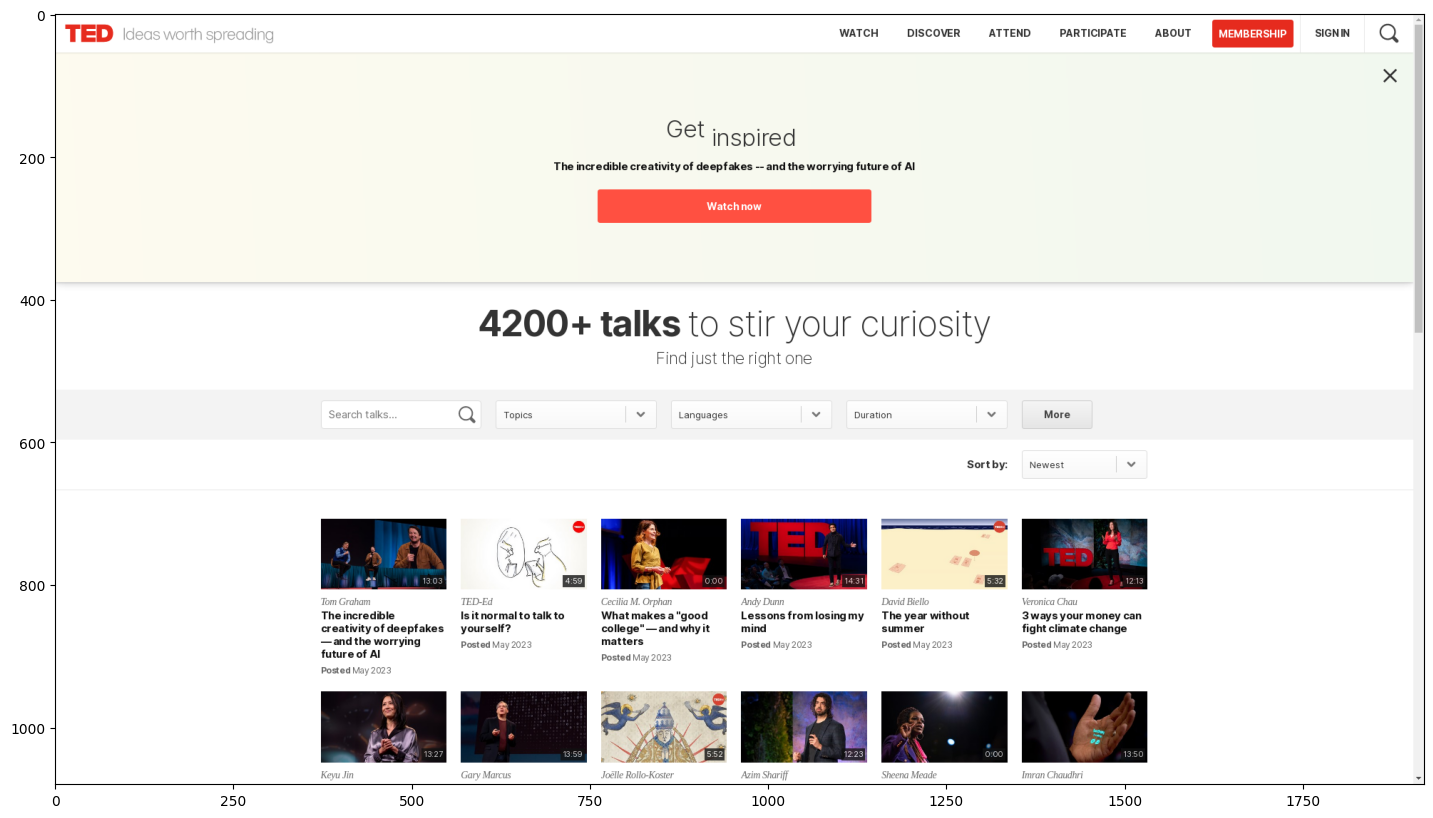

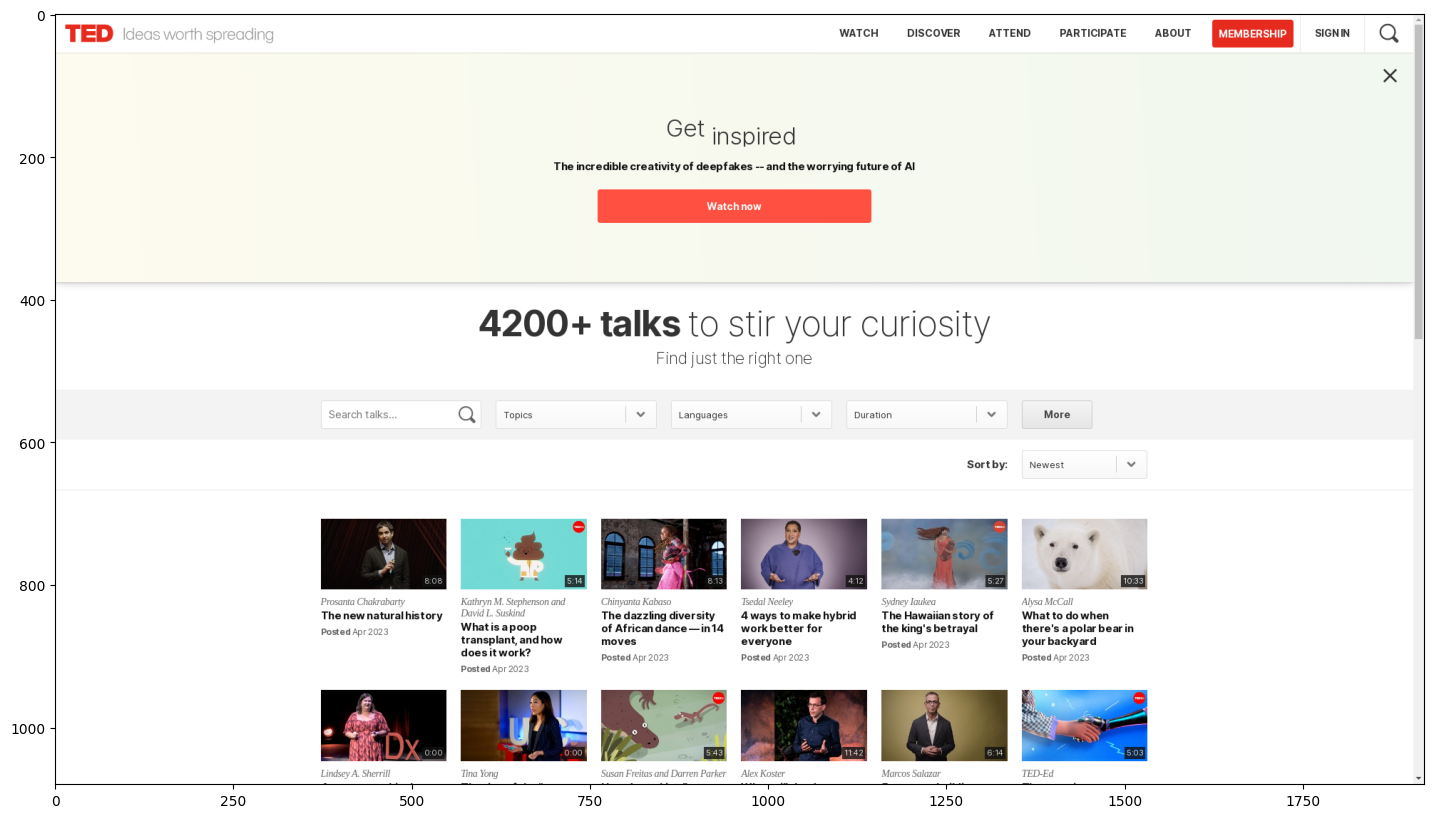

In [ ]:
url_format = "https://www.ted.com/talks?page={0:d}"

for i in range(1,3):
  main_web = openweb(url_format.format(i))
  plot_webpage(main_web)
  main_web.close()

# Start Crawler

### [Old function] Main parser for tedtalk
因Ted官網開始擋爬蟲，下面這段僅能執行1小時58即中斷，故而使用新的程式碼

In [ ]:
url_format = "https://www.ted.com/talks?page={0:d}"
failed_topics = {}

## topic_transcripts is a dictionary
## key: title, value: (transcripts, url)
topic_transcripts = {}
c = 0
for i in range(1,60):

  main_web = openweb(url_format.format(i))
  # topic_urls is a dictionary which maps title(key) to
  # a dictionary {"url": url, "date": release_date}
  topic_urls = find_topic_list(main_web)

  for j, k in enumerate(topic_urls.keys()):
    _topic_url = topic_urls[k]["url"]
    _date = topic_urls[k]["date"]

    # if c %20 == 0: print(c, _topic_url) #每處理20個主題，輸出已處理的主題數量和當前主題的網址。

    topic_web = openweb(_topic_url)
    try:
      click_success = click_read_transcripts(topic_web) #模擬用戶點擊網頁上的按鈕，以獲取文稿。
    except Exception as e:
      print("unexpect error at {}".format(_topic_url))
      plot_webpage(topic_web)
      raise e
    if not click_success:
      c+=1
      print("failed", i, j, k,  _topic_url)
      failed_topics[k] = _topic_url
      continue
    wait_flag = True
    while wait_flag:
      try:
        text, timestamp_map = parse_transcripts(topic_web)
        wait_flag = False
      except ValueError as e:
        time.sleep(1)
        continue
      except Exception as e:
        plot_webpage(topic_web)
        print(e)
        raise Exception("parse topic {} failed. url: {}".format(k, _topic_url))
    ## use the tuple to save data
    topic_transcripts[k] = {"text":text, "url":_topic_url, "date":_date, "timestamp":timestamp_map}

    topic_web.close()
    c+=1
  print(i, _topic_url)
  main_web.close()

failed 1 12 How to teach "for" students, not "at" them https://www.ted.com/talks/brian_johnson_how_to_teach_for_students_not_at_them
failed 1 16 How poetry unlocked my superpowers https://www.ted.com/talks/keenan_scott_ii_how_poetry_unlocked_my_superpowers
failed 1 20 Why are schools more segregated now than in the 1980s? https://www.ted.com/talks/sonia_park_why_are_schools_more_segregated_now_than_in_the_1980s
failed 1 35 How to declutter when you feel like a failure https://www.ted.com/talks/monica_fay_how_to_declutter_when_you_feel_like_a_failure
1 https://www.ted.com/talks/monica_fay_how_to_declutter_when_you_feel_like_a_failure
failed 2 0 The new natural history https://www.ted.com/talks/prosanta_chakrabarty_the_new_natural_history
failed 2 19 "Damballa Wedo" / "The Dilemma" https://www.ted.com/talks/melanie_charles_damballa_wedo_the_dilemma
failed 2 21 How agri-robotics will change the food you eat https://www.ted.com/talks/katherine_james_how_agri_robotics_will_change_the_food_y

KeyboardInterrupt: ignored

Mount google cloud disk

In [ ]:
import gdown, os, zipfile, sys, json
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"
tedtalk_data_folder = os.path.join(mydrive, "ted_data")
os.makedirs(tedtalk_data_folder, exist_ok=True)
tedtalk_filename = os.path.join(tedtalk_data_folder, "ted_transcripts.json")

Mounted at /content/drive


Save data

In [ ]:
with open(tedtalk_filename, "w") as f:
  s_ = json.dumps(topic_transcripts, indent=4)
  f.write(s_)

### [New function] 因為Ted網頁更新，固定時間會斷，所以先抓topic, url, date

In [ ]:
def get_topic_list():
  url_format = "https://www.ted.com/talks?page={0:d}"
  topic_list = {}
  failed_topics = {}

  topic_transcripts = {}
  c = 0
  last_page = 61 # data from 2017-2023
  for i in range(1,last_page):
    print("topic progress: {0:>3d}/{1:d}".format(i, last_page))

    main_web = openweb(url_format.format(i))
    # topic_urls is a dictionary which maps title(key) to
    # a dictionary {"url": url, "date": release_date}
    topic_urls = find_topic_list(main_web)


    for j, k in enumerate(topic_urls.keys()):
      _topic_url = topic_urls[k]["url"]
      _date = topic_urls[k]["date"]
      topic_list[k] = {"url":_topic_url, "date":_date}
    main_web.close()
    time.sleep(0.5)
  return topic_list

def get_transcripts(_topic_url, k):

  topic_web = openweb(_topic_url)
  try:
    click_success = click_read_transcripts(topic_web) #模擬用戶點擊網頁上的按鈕，以獲取文稿。
  except Exception as e:
    print("unexpect error at {}".format(_topic_url))
    plot_webpage(topic_web)
    raise e
  if not click_success:
    # c+=1
    print("failed", k,  _topic_url)
    return False, None, None
  wait_flag = True
  while wait_flag:
    try:
      text, timestamp_map = parse_transcripts(topic_web)
      wait_flag = False
    except ValueError as e:
      time.sleep(1)
      continue
    except Exception as e:
      plot_webpage(topic_web)
      print(e)
      raise Exception("parse topic {} failed. url: {}".format(k, _topic_url))
  ## use the dictionary to save data
  # topic_transcripts={
  #   k:{
  #      "text":text,
  #      "url":_topic_url,
  #      "date":_date,
  #      "timestamp":timestamp_map
  #   }
  # }

  topic_web.close()
  return True, text, timestamp_map


In [ ]:
import gdown, os, zipfile, sys, json
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"
tedtalk_data_folder = os.path.join(mydrive, "ted_data")
os.makedirs(tedtalk_data_folder, exist_ok=True)
tedtalk_filename = os.path.join(tedtalk_data_folder, "ted_transcripts.json")
tedtalk_filename2 = os.path.join(tedtalk_data_folder, "ted_transcripts_record.json")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_topic_url = get_topic_list()
with open(tedtalk_filename2, "w") as f:
  s_ = json.dumps(all_topic_url, indent=4)
  f.write(s_)

topic progress:   1/61
topic progress:   2/61
topic progress:   3/61
topic progress:   4/61
topic progress:   5/61
topic progress:   6/61
topic progress:   7/61
topic progress:   8/61
topic progress:   9/61
topic progress:  10/61
topic progress:  11/61
topic progress:  12/61
topic progress:  13/61
topic progress:  14/61
topic progress:  15/61
topic progress:  16/61
topic progress:  17/61
topic progress:  18/61
topic progress:  19/61
topic progress:  20/61
topic progress:  21/61
topic progress:  22/61
topic progress:  23/61
topic progress:  24/61
topic progress:  25/61
topic progress:  26/61
topic progress:  27/61
topic progress:  28/61
topic progress:  29/61
topic progress:  30/61
topic progress:  31/61
topic progress:  32/61
topic progress:  33/61
topic progress:  34/61
topic progress:  35/61
topic progress:  36/61
topic progress:  37/61
topic progress:  38/61
topic progress:  39/61
topic progress:  40/61
topic progress:  41/61
topic progress:  42/61
topic progress:  43/61
topic progr

In [ ]:
len(all_topic_url)

2160

### 再抓transcripts, timestamp. 若網頁斷掉，只需再重跑以下這格

0
1
2
3
4
5
6
7
8
9
10
11
12
failed How to teach "for" students, not "at" them https://www.ted.com/talks/brian_johnson_how_to_teach_for_students_not_at_them
13
14
15
16
failed How poetry unlocked my superpowers https://www.ted.com/talks/keenan_scott_ii_how_poetry_unlocked_my_superpowers
17
18
19
20
failed Why are schools more segregated now than in the 1980s? https://www.ted.com/talks/sonia_park_why_are_schools_more_segregated_now_than_in_the_1980s
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
failed How to declutter when you feel like a failure https://www.ted.com/talks/monica_fay_how_to_declutter_when_you_feel_like_a_failure
36
failed The new natural history https://www.ted.com/talks/prosanta_chakrabarty_the_new_natural_history
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
failed "Damballa Wedo" / "The Dilemma" https://www.ted.com/talks/melanie_charles_damballa_wedo_the_dilemma
56
57
failed How agri-robotics will change the food you eat https://www.ted.com/talks/katherine_j

/usr/local/lib/python3.10/dist-packages/selenium/webdriver/remote/webdriver.py:889: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn(


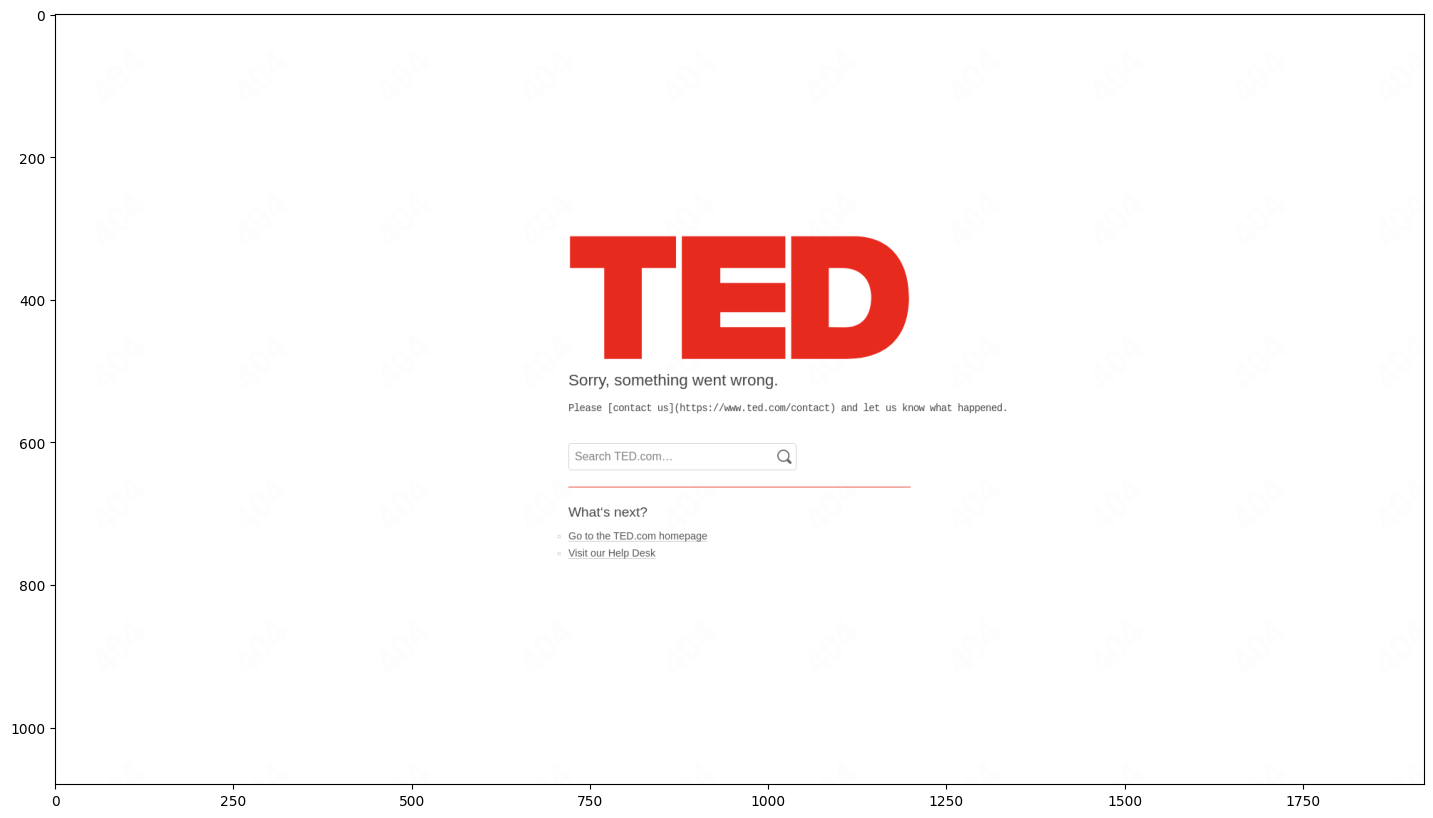

there are multiple 0 'div' tag with class 'mx-auto mb-10 w-full'
parse topic A tailored history of who wears what — and why failed. url: https://www.ted.com/talks/richard_thompson_ford_a_tailored_history_of_who_wears_what_and_why
the 648 topic A tailored history of who wears what — and why was parsed failed and save the results


In [ ]:
tedtalk_data_folder = os.path.join(mydrive, "ted_data")
tedtalk_filename2 = os.path.join(tedtalk_data_folder, "ted_transcripts_record.json")
with open(tedtalk_filename2, 'r') as f:
  ## load data
  ## tedtalk_topic2transcripts is a dictionary
  ## key: title, value: (transcripts, url)
  tedtalk_topic2transcripts = json.loads(f.read())
topic_keys = list(tedtalk_topic2transcripts.keys())
for i, topic in enumerate(topic_keys):

  if "text" in tedtalk_topic2transcripts[topic].keys():
    print(i, "finished", end="\r")
    continue
  print(i)
  _url = tedtalk_topic2transcripts[topic]["url"]

  try:
    flag, text, timestamp_map = get_transcripts(_url, topic)
  except Exception as e:
    # with open(tedtalk_filename2, "w") as f:
    #   s_ = json.dumps(tedtalk_topic2transcripts, indent=4)
    #   f.write(s_)
    print(e)
    print("the {} topic {} was parsed failed and save the results".format(i, topic))
    break

  # parse failed, cannot find transcripts
  if not flag:
    continue
  tedtalk_topic2transcripts[topic]["text"] = text
  tedtalk_topic2transcripts[topic]["timestamp"] = timestamp_map

with open(tedtalk_filename2, "w") as f:
  s_ = json.dumps(tedtalk_topic2transcripts, indent=4)
  f.write(s_)

failed How to teach "for" students, not "at" them https://www.ted.com/talks/brian_johnson_how_to_teach_for_students_not_at_them
failed How poetry unlocked my superpowers https://www.ted.com/talks/keenan_scott_ii_how_poetry_unlocked_my_superpowers
failed Why are schools more segregated now than in the 1980s? https://www.ted.com/talks/sonia_park_why_are_schools_more_segregated_now_than_in_the_1980s
failed How to declutter when you feel like a failure https://www.ted.com/talks/monica_fay_how_to_declutter_when_you_feel_like_a_failure
failed The new natural history https://www.ted.com/talks/prosanta_chakrabarty_the_new_natural_history
failed "Damballa Wedo" / "The Dilemma" https://www.ted.com/talks/melanie_charles_damballa_wedo_the_dilemma
failed How agri-robotics will change the food you eat https://www.ted.com/talks/katherine_james_how_agri_robotics_will_change_the_food_you_eat
failed The history (and future) of women in STEM https://www.ted.com/talks/nathalia_holt_the_history_and_future_

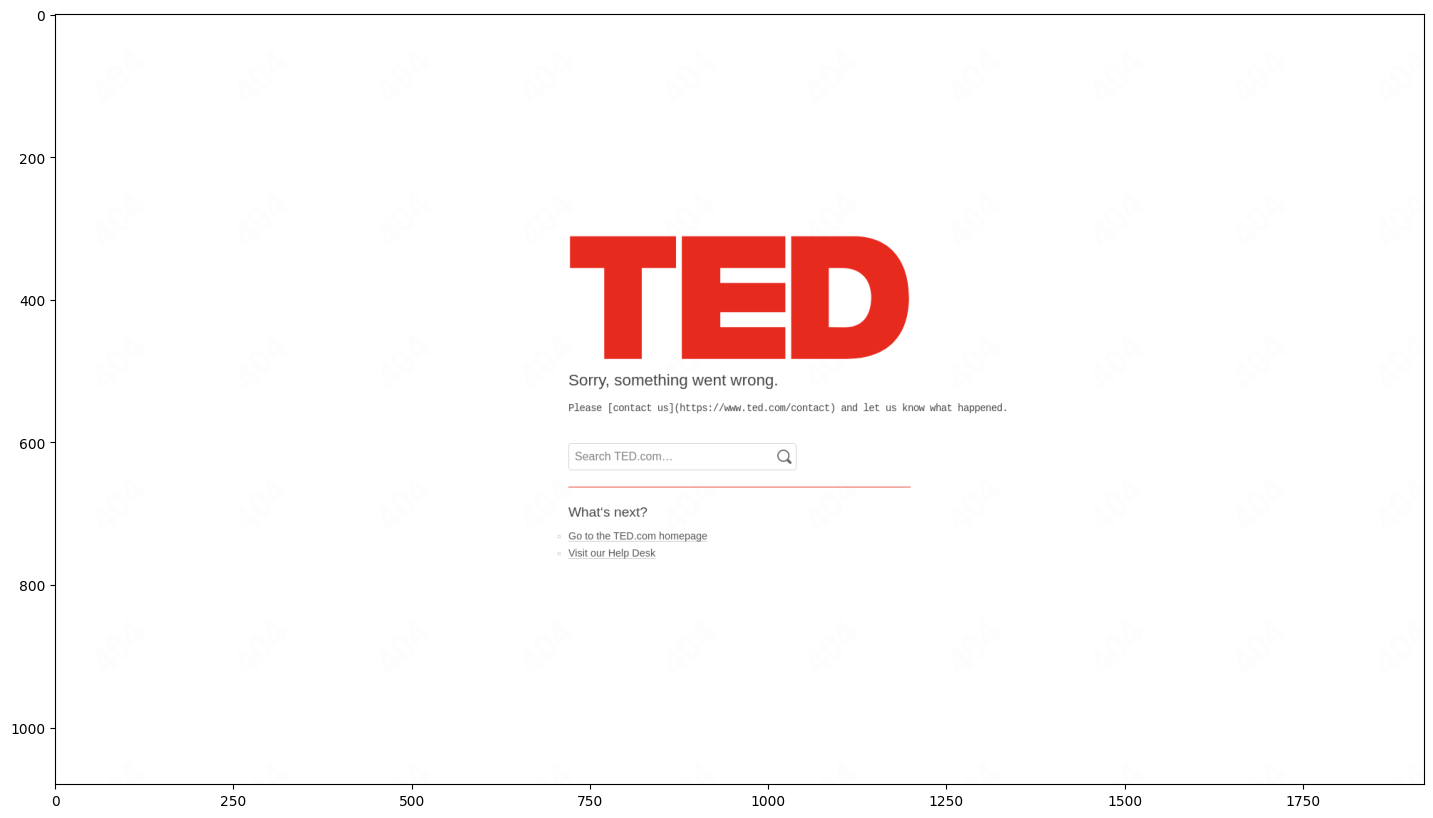

there are multiple 0 'div' tag with class 'mx-auto mb-10 w-full'


In [ ]:
_flag = True
while _flag:
  tedtalk_filename2 = os.path.join(tedtalk_data_folder, "ted_transcripts_record.json")
  with open(tedtalk_filename2, 'r') as f:
    ## load data
    ## tedtalk_topic2transcripts is a dictionary
    ## key: title, value: (transcripts, url)
    tedtalk_topic2transcripts = json.loads(f.read())
  topic_keys = list(tedtalk_topic2transcripts.keys())
  for i, topic in enumerate(topic_keys):

    if "text" in tedtalk_topic2transcripts[topic].keys():
      # print(i, "finished", end="\r")
      continue
    if i%10==0: print(i, end="\r")
    _url = tedtalk_topic2transcripts[topic]["url"]

    try:
      flag, text, timestamp_map = get_transcripts(_url, topic)
    except Exception as e:
      with open(tedtalk_filename2, "w") as f:
        s_ = json.dumps(tedtalk_topic2transcripts, indent=4)
        f.write(s_)
      time.sleep(int(60*90))
      print(e)
      print("the {} topic {} was parsed failed and save the results".format(i, topic))
      break

    # parse failed, cannot find transcripts
    if not flag:
      ## remove topic which transcripts cannot be parsed
      tedtalk_topic2transcripts.pop(topic)
      continue
    tedtalk_topic2transcripts[topic]["text"] = text
    tedtalk_topic2transcripts[topic]["timestamp"] = timestamp_map

  # with open(tedtalk_filename2, "w") as f:
  #   s_ = json.dumps(tedtalk_topic2transcripts, indent=4)
  #   f.write(s_)


  topic_keys = list(tedtalk_topic2transcripts.keys())
  for k in topic_keys:
    if "text" in tedtalk_topic2transcripts[topic].keys():
      _flag=False
    else:
      _flag=True
      break

with open(tedtalk_filename2, "w") as f:
  s_ = json.dumps(tedtalk_topic2transcripts, indent=4)
  f.write(s_)

確認檔案

In [ ]:
topic_keys = list(tedtalk_topic2transcripts.keys())
for k in topic_keys:
  if "timestamp" in tedtalk_topic2transcripts[topic].keys():
    _flag=False
  else:
    _flag=True
    break
_flag

In [ ]:
len(tedtalk_topic2transcripts)

# Step2: Process data

# [Put "ted_data" in the cloud and you can start from here, no need to crawl again]

##Read data and parse it to string

In [ ]:
import gdown, os, zipfile, sys, json
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

tedtalk_data_folder = os.path.join(mydrive, "ted_data")
os.makedirs(tedtalk_data_folder, exist_ok=True)

tedtalk_data_folder = os.path.join(mydrive, "ted_data")
tedtalk_filename = os.path.join(tedtalk_data_folder, "ted_transcripts_record.json")
with open(tedtalk_filename, 'r') as f:
  ## load data
  ## tedtalk_topic2transcripts is a dictionary
  ## key: title, value: (transcripts, url)
  tedtalk_topic2transcripts = json.loads(f.read())
transcripts_list = [] # list of all transcipt
topic_list = []    # list of all topic name
url_list = []     # list of all url
date_list = []
timestamp_map_list = []
## tedtalk_topic2transcripts is a dictionary
## key: title, value: (transcripts, url, date)
for k in tedtalk_topic2transcripts.keys():
  topic_list.append(k)
  # tedtalk_topic2transcripts[k][0] is transcripts of topic
  transcripts_list.append(tedtalk_topic2transcripts[k]["text"])
  url_list.append(tedtalk_topic2transcripts[k]["url"])
  date_list.append(tedtalk_topic2transcripts[k]["date"])
  timestamp_map_list.append(tedtalk_topic2transcripts[k]["timestamp"])

Mounted at /content/drive


In [ ]:
import re
norm_transcripts_list = []
for i in range(len(transcripts_list)):
  text_replace = re.sub(r'\n',' ',transcripts_list[i])
  text_replace = re.sub(r'\u201d','',text_replace)
  text_replace = re.sub(r'\u201c','',text_replace)
  text_replace = re.sub(r'\u2019','',text_replace)
  text_replace = re.sub(r'\u2014','',text_replace)
  text_replace = re.sub(r'\"','',text_replace)
  text_replace = re.sub(r'(Applause)','',text_replace)
  text_replace = re.sub(r'(Laughter)','',text_replace)
  text_replace = re.sub(r'Thank you.','',text_replace)
  text_replace = re.sub(r'Thank you very much.','',text_replace)
  text_replace = re.sub(r'(Cheers and applause)','',text_replace)
  text_replace = re.sub(r'(Applause and cheers)','',text_replace)
  text_replace = re.sub(r'little bit','',text_replace)
  text_replace = re.sub(r'([\n+\t+]|\s{2,})', '',text_replace) # Remove \t, \n and spaces more than two times
  norm_transcripts_list.append(text_replace)

# Method 1:use Word2Vec to build Feature Matrix

功能1: 推薦相似影片

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

每次用之前都要下載模型 大概1G要下很久

1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).

In [ ]:
import gensim.downloader
word2vec_model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[--------------------------------------------------] 0.7% 6.7/958.4MB downloaded

KeyboardInterrupt: ignored

save model

In [ ]:
word2vec_model.save("/content/drive/My Drive/Colab Notebooks/ted_data/word2vec_model")

load model

In [ ]:
from gensim.models import KeyedVectors

word2vec_model = KeyedVectors.load("/content/drive/My Drive/Colab Notebooks/ted_data/word2vec_model")

In [ ]:
feature_matrix = np.zeros((len(norm_transcripts_list), word2vec_model.vector_size))
for i, document in enumerate(norm_transcripts_list):
    tokens = simple_preprocess(remove_stopwords(document)) #remove_stopwords去除停用詞，simple_preprocess將文字轉換成小寫並移除標點符號
    for token in tokens:
      if word2vec_model.__contains__(token):
        feature_matrix[i] += word2vec_model[token]


# save feature matrix

In [ ]:
np.savetxt("/content/drive/My Drive/Colab Notebooks/ted_data/feature_matrix.csv", feature_matrix, delimiter=',')

#load feature matrix

In [ ]:
feature_matrix = np.loadtxt("/content/drive/My Drive/Colab Notebooks/ted_data/feature_matrix.csv", delimiter=",")
print(feature_matrix.shape)

(1853, 300)


## Cosine Similarity of each transcripts

In [ ]:
def most_similar_topic(sentense, num=1):
  #need to download model and feature matrix first
  words = sentense.split()
  vector = np.zeros(word2vec_model.vector_size)
  for word in words:
    if word2vec_model.__contains__(word):
      vector += word2vec_model[word]
  similarities = cosine_similarity(vector.reshape(1, -1), feature_matrix)
  top_indices = np.argsort(similarities[0])[::-1][:num]
  return top_indices

In [ ]:
def most_similar_topic(topic_id, num=1):
  similarities = cosine_similarity(feature_matrix[topic_id].reshape(1, -1), feature_matrix)
  top_indices = np.argsort(similarities[0])[::-1][:num+1]
  return top_indices[1:]

test

In [ ]:
ids = most_similar_topic("AI", 10)
for id in ids:
  print(id, topic_list[id], url_list[id])

415 Self-assembling robots and the potential of artificial evolution https://www.ted.com/talks/emma_hart_self_assembling_robots_and_the_potential_of_artificial_evolution
1556 A brief history of chess https://www.ted.com/talks/alex_gendler_a_brief_history_of_chess
1429 How I'm using biological data to tell better stories — and spark social change https://www.ted.com/talks/heidi_boisvert_how_i_m_using_biological_data_to_tell_better_stories_and_spark_social_change
1360 How humans and AI can work together to create better businesses https://www.ted.com/talks/sylvain_duranton_how_humans_and_ai_can_work_together_to_create_better_businesses
640 A sci-fi vision of life in 2041 https://www.ted.com/talks/chen_qiufan_a_sci_fi_vision_of_life_in_2041
1224 The dark history of IQ tests https://www.ted.com/talks/stefan_c_dombrowski_the_dark_history_of_iq_tests
1134 What do all languages have in common? https://www.ted.com/talks/cameron_morin_what_do_all_languages_have_in_common
824 What is deep tech? 

In [ ]:
ids = most_similar_topic(415, 10)
for id in ids:
  print(id, topic_list[id], url_list[id])

1437 Why I draw with robots https://www.ted.com/talks/sougwen_chung_why_i_draw_with_robots
1744 The artificial muscles that will power robots of the future https://www.ted.com/talks/christoph_keplinger_the_artificial_muscles_that_will_power_robots_of_the_future
1473 The next software revolution: programming biological cells https://www.ted.com/talks/sara_jane_dunn_the_next_software_revolution_programming_biological_cells
1626 Origami robots that reshape and transform themselves https://www.ted.com/talks/jamie_paik_origami_robots_that_reshape_and_transform_themselves
810 Possible futures from the intersection of nature, tech and society https://www.ted.com/talks/natsai_audrey_chieza_possible_futures_from_the_intersection_of_nature_tech_and_society
132 Are insect brains the secret to great AI? https://www.ted.com/talks/frances_s_chance_are_insect_brains_the_secret_to_great_ai
1124 What happens when biology becomes technology? https://www.ted.com/talks/christina_agapakis_what_happens_when

# Method1.5: Find timestamp

In [ ]:
def most_similar_timestamp(sentense, topic_id, num=1):
  words = sentense.split()
  vector = np.zeros(word2vec_model.vector_size)
  for word in words:
    if word2vec_model.__contains__(word):
      vector += word2vec_model[word]
  #build timestamp feature matrix
  timestamp = timestamp_map_list[topic_id]
  matrix = np.zeros((len(timestamp), word2vec_model.vector_size))
  for i,v in enumerate(timestamp.values()):
    words = v.split()
    for word in words:
      if word2vec_model.__contains__(word):
        matrix[i] += word2vec_model[word]

  similarities = cosine_similarity(vector.reshape(1, -1), matrix)
  top_indices = np.argsort(similarities[0])[::-1][:num]

  res=[]
  keylist = list(timestamp.keys())
  for i in top_indices:
    res.append(keylist[i]+"-"+keylist[i+1])
  return res

test

In [ ]:
most_similar_timestamp("how robot learn", 415, 2)

['00:32-00:52', '00:01-00:32']

# Method 2: WordCloud

功能2: 推薦年度/月份趨勢

## K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
!pip3 install wget
import matplotlib.patches as patches
import random
from wordcloud import WordCloud
# Prepared font
import wget
wget.download("https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download","TaipeiSansTCBeta-Regular.ttf")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'TaipeiSansTCBeta-Regular (1).ttf'

In [ ]:
# function for K-means clustering
def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters, n_init=500, random_state = 1,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

## Elbow Chat

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(feature_matrix)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

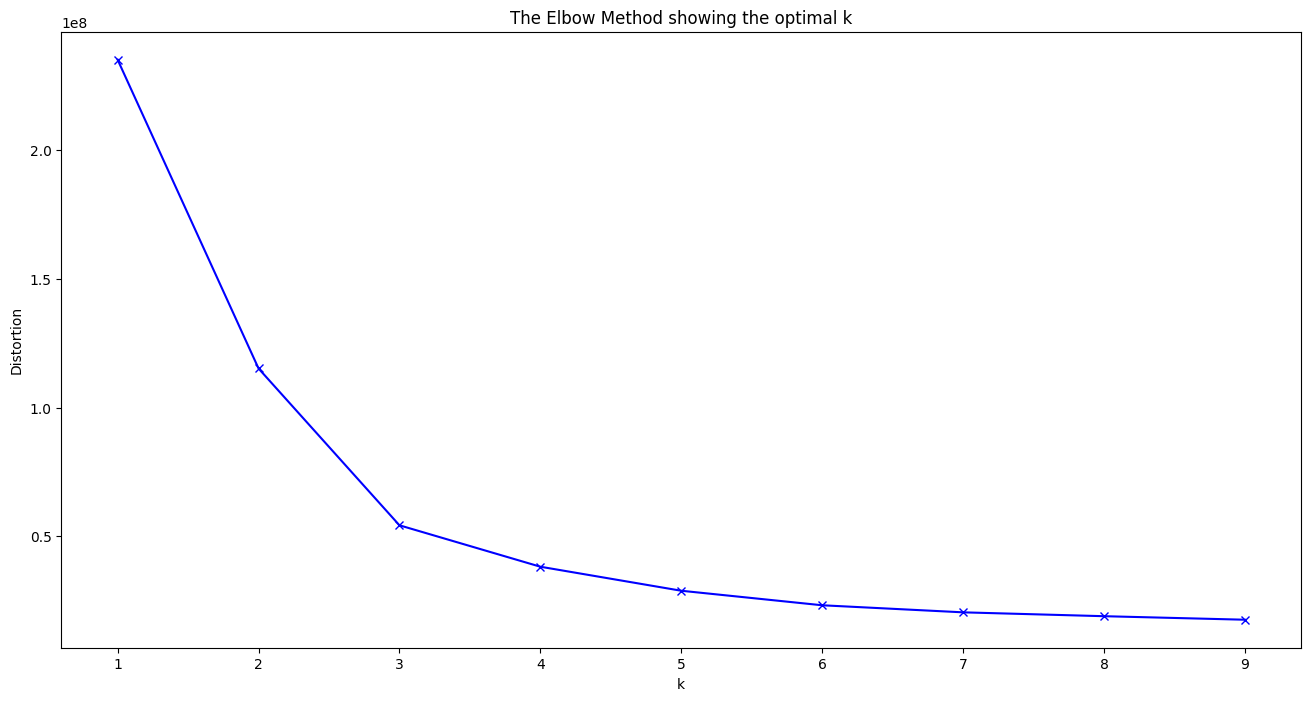

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

從生成的圖可以看到彎曲最大的點是3

In [ ]:
num_clusters = 3

km_obj, km_clusters = k_means(feature_matrix=feature_matrix,num_clusters=num_clusters)
topic_clusters = km_clusters

In [ ]:
m_clusters = {}
for i in range(num_clusters): #創建每一個cluster空的list
  m_clusters[i] = []
for i in range(len(topic_clusters)):
  topic_pred_cluster = topic_clusters[i]
  m_clusters[topic_pred_cluster].append(i) #找出topic
for i in range(num_clusters): #特定topic的cluster
  print(len(m_clusters[i]), i)

In [ ]:
def generate_wordlist(synopsis_series):
    wordlist = []
    for text in synopsis_series:
        words = word_tokenize(text)
        pos_tags = nltk.pos_tag(words)

        for i, (word, pos) in enumerate(pos_tags):
            if i == 0 and word.lower() in ('first', 'same', 'other'):
                continue
            if pos in ('NN', 'JJ') and i < len(pos_tags) - 1:
                next_word, next_pos = pos_tags[i + 1]
                if next_pos == 'NN' and next_word not in ('time', 'year', 'thing'):
                    compound_word = f"\"{word}_{next_word}\""
                    wordlist.append(compound_word)
#                else:
#                    wordlist.append(word)
#            elif pos not in ('NN', 'JJ'):
#                wordlist.append(word)
    return wordlist

In [ ]:
def plot_wordcloud_for_cluster(mytitle, seg_list):

  fig, ax = plt.subplots(figsize=(6, 6), dpi=300)  # Create a figure and axes

  # List of colormaps
  colormaps = ['plasma', 'inferno', 'magma', 'viridis', 'cividis', 'twilight', 'tab10']

  # Randomly pick a colormap
  random_colormap = random.choice(colormaps)

  wc = WordCloud(
      width=1500,
      height=1500,
      background_color='white',               #   Background Color
      max_words=150,                    #   Max words
  #    mask=back_image,                       #   Background Image
      max_font_size=None,                   #   Font size
      font_path="TaipeiSansTCBeta-Regular.ttf",
      random_state=50,                    #   Random color
      regexp=r"\w+(?:[-']\w+)*",  # Update the regexp parameter to include hyphens, you can mark out this line to hide the space character.
      contour_width=1,  # adjust the contour width
      contour_color='black',  # adjust the contour color
      colormap=random_colormap,  # choose a different colormap
      prefer_horizontal=0.9)                #   Ratio

  wc.generate(seg_list)
  freq = wc.process_text(seg_list)


  # Add a border to the plot
  border = patches.Rectangle((0, 0), 1500, 1500, linewidth=2, edgecolor='black', facecolor='none')
  ax.add_patch(border)

  # Plot
  plt.axis("off")
  plt.imshow(wc, interpolation="bilinear")
  plt.title(mytitle, fontsize=24, color='#0a9396', pad=4)
  return sorted(freq.keys(), key=lambda s:freq[s], reverse=True)[:5]


# Clustering

## Each clustering trend

In [ ]:
top_list_cluster = []
for i in range(num_clusters):
  top_list_cluster.append([])

def generate_clustering_word_cloud(num):
  this_wordlist = ''
  title = f"Word Cloud for {num}"

  this_wordlist = generate_wordlist([norm_transcripts_list[i] for i in m_clusters[num]])

  this_seg_list=' '.join(this_wordlist) # convert list into string seperated with space character

  top_list_cluster[num] = plot_wordcloud_for_cluster(title, this_seg_list)
  plt.savefig("/content/drive/My Drive/Colab Notebooks/ted_data/wordcloud/cluster"+str(num)+".png", dpi=300, bbox_inches="tight")

In [ ]:
for i in range(num_clusters):
  generate_clustering_word_cloud(i)

save data

In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/ted_data/top_clustering_list.json", "w") as f:
  s_ = json.dumps(top_list_cluster, indent=4)
  f.write(s_)

Three Cluster name:
1. **CO2 Fighters**: climate_change,immune_system,health_care,carbon_dioxide,climate_crisis
2. **Wellness Warriors**: climate_change,health_care,high_school,climate_crisis,good_news
3. **Zero Carbon Warriors**: climate_crisis,climate_change,net_zero,public_health,only_way


## Each year and month clustering trend

In [ ]:

group_by_year = {}
top_list_year = {}
wordlist_yaer = {}
group_by_month = {}
top_list_month = {}
wordlist_month = {}
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(2019,2024):
  group_by_year[i] = []
  top_list_year[i] = []
  wordlist_yaer[i] = []
  group_by_month[i] = {}
  top_list_month[i] = {}
  wordlist_month[i] = {}
  for j in range(12):
    group_by_month[i][month[j]] = []
    top_list_month[i][month[j]] = []
    wordlist_month[i][month[j]] = []

for i in range(len(date_list)):
  y = int(date_list[i].split()[1])
  m = date_list[i].split()[0]
  group_by_year[y].append(i)
  group_by_month[y][m].append(i)


# for y ,v in group_by_month.items():
#   if y > 2019:
#     for m, val in group_by_month[y].items():
#       print(y, m, len(val))
os.makedirs("/content/drive/My Drive/Colab Notebooks/ted_data/wordcloud/", exist_ok=True)

In [ ]:
def generate_year_trend(year):
    this_wordlist = ''
    title = f"Word Cloud for {year}"

    if wordlist_yaer[year] == []:
        this_wordlist = generate_wordlist([norm_transcripts_list[i] for i in group_by_year[year]])
        wordlist_yaer[year] = this_wordlist
    this_wordlist = wordlist_yaer[year]

    filtered_wordlist = []
    for word in this_wordlist:
        words = word.split('_')
        if all(w.lower() not in ('only', 'first', 'same', 'other', 'time', 'year', 'thing', 'way') for w in words):
            filtered_wordlist.append(word)

    this_seg_list = ' '.join(filtered_wordlist)  # convert list into string separated with space character

    top_list_year[year] = plot_wordcloud_for_cluster(title, this_seg_list)
    plt.savefig("/content/drive/My Drive/Colab Notebooks/ted_data/wordcloud/"+str(year)+".png", dpi=300, bbox_inches="tight")

In [ ]:
for i in range(2019, 2024):
  if len(group_by_year[i]) > 0:
    generate_year_trend(i)

In [ ]:
def generate_month_trend(year, month):
  #month should be in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  this_wordlist = ''
  title = f"Word Cloud for {month} {year}"

  if wordlist_month[year][month] == []:
    this_wordlist = generate_wordlist([norm_transcripts_list[i] for i in group_by_month[year][month]])
    wordlist_month[year][month] = this_wordlist
  this_wordlist = wordlist_month[year][month]

  this_seg_list=' '.join(this_wordlist) # convert list into string seperated with space character

  top_list_month[year][month] = plot_wordcloud_for_cluster(title, this_seg_list)
  plt.savefig("/content/drive/My Drive/Colab Notebooks/ted_data/wordcloud/"+str(year)+month+".png", dpi=300, bbox_inches="tight")

In [ ]:
def generate_month_trend(year, month):
    # month should be in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    this_wordlist = ''
    title = f"Word Cloud for {month} {year}"

    if wordlist_month[year][month] == []:
        this_wordlist = generate_wordlist([norm_transcripts_list[i] for i in group_by_month[year][month]])
        wordlist_month[year][month] = this_wordlist
    this_wordlist = wordlist_month[year][month]

    filtered_wordlist = []
    for word in this_wordlist:
        words = word.split('_')
        if all(w.lower() not in ('first', 'same', 'other', 'time', 'year', 'thing') for w in words):
            filtered_wordlist.append(word)

    this_seg_list = ' '.join(filtered_wordlist)  # convert list into string separated with space character

    top_list_month[year][month] = plot_wordcloud_for_cluster(title, this_seg_list)
    plt.savefig("/content/drive/My Drive/Colab Notebooks/ted_data/wordcloud/"+str(year)+month+".png", dpi=300, bbox_inches="tight")

In [ ]:
for i in range(2019, 2024):
  for j in month:
    if len(group_by_month[i][j]) > 0:
      generate_month_trend(i,j)

save data

In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/ted_data/top_year_list.json", "w") as f:
  s_ = json.dumps(top_list_year, indent=4)
  f.write(s_)

with open("/content/drive/My Drive/Colab Notebooks/ted_data/top_month_list.json", "w") as f:
  s_ = json.dumps(top_list_month, indent=4)
  f.write(s_)

# Method 3: pre-trained RoBERTa model and tokenizer for Q&A

功能3: Q&A

In [ ]:
!pip3 install -U transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.7 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

# Load the pre-trained RoBERTa model and tokenizer for question-answering
model_name = "deepset/roberta-base-squad2"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
topic_list[415]

'Self-assembling robots and the potential of artificial evolution'

In [ ]:
# Define the context and question
context = norm_transcripts_list[415]
question = "what is artificial evolution"

print(f"""Context: {context}""")

# question = input("Please input your question to the context: ")

# Tokenize the input text and convert it to a PyTorch tensor, max_length=None
inputs = tokenizer(question, context, max_length=None, truncation=True, padding="max_length", return_tensors="pt")

# Perform question-answering using the model
with torch.no_grad():
    outputs = model(**inputs)
    start_scores, end_scores = outputs.start_logits, outputs.end_logits

# Get the start and end positions of the answer
start_position = torch.argmax(start_scores)
end_position = torch.argmax(end_scores)

# Convert the positions to tokens and join them to get the answer
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][start_position:end_position + 1])
answer = tokenizer.convert_tokens_to_string(tokens)

# Display the result
print(f"Question: {question}")
print(f"Answer: {answer}")

Context: Imagine a scientist who wants to send a robot to explore in a faraway place, a place whose geography might be completely unknown and perhaps inhospitable. Now imagine that instead of first designing that robot and sending it off in the hope that it might be suitable, instead, she sends a robot-producing technology that figures out what kind of robot is needed once it arrives, builds it and then enables it to continue to evolve to adapt to its new surroundings. Its exactly what my collaborators and I are working on: a radical new technology which enables robots to be created, reproduce and evolve over long periods of time, a technology where robot design and fabrication becomes a task for machines rather than humans. Robots are already all around us, in factories, in hospitals, in our home. But from an engineer's perspective, designing a shelf-stacking robot or a Roomba to clean our home is relatively straightforward. We know exactly what they need to do, and we can imagine the

Q: max_length=512?

In [ ]:
tokenizer.max_model_input_sizes

# Method 4: pre-trained BART model and tokenizer for Summary

功能4: 簡介影片

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load the pre-trained BART model and tokenizer for summarization
model_name = "facebook/bart-large-cnn"
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer = BartTokenizer.from_pretrained(model_name)

* Summary the 1st film of Ted

In [ ]:
input_text = norm_transcripts_list[0] #Summary第一篇文章
print(input_text)

# Tokenize the input text and convert it to a PyTorch tensor
inputs = tokenizer(input_text, return_tensors="pt", max_length=1024, truncation=True)

# Perform text summarization using the BART model
with torch.no_grad():
    outputs = model.generate(**inputs)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Display the result
print(f"Summary: {summary}")

Its April 10th, 1815,and in just a few moments, the sun is going to disappear. On an island in present-day Indonesia, Mount Tambora erupts with a boom that can be heard over 2,000 kilometers away. Sulfurous plumes of steam and ash billow thousands of meters into the sky, forming dark storm clouds of soot and lightning. This eruption will go down as the largest in recorded history, but, at this point,its impact is only just beginning. Ascending high into the atmosphere, Tamboras emissions spread across the globe, blotting out the sunfor almost an entire year. The hazy skies and cold weather of 1816 wreak havoc on agriculture, leading to famines all across the Northern Hemisphere. Nations struggle with epidemics, and artists craft bleak tributesto these seemingly apocalyptic times. This was the year without summer literally one of the darkest periods in human history. So why are some modern researchers looking for ways to repeat it? Obviously, no one wants to replicate this periods famin

Q: max_length=1024?

In [ ]:
tokenizer.max_model_input_sizes

{'facebook/bart-base': 1024,
 'facebook/bart-large': 1024,
 'facebook/bart-large-mnli': 1024,
 'facebook/bart-large-cnn': 1024,
 'facebook/bart-large-xsum': 1024,
 'yjernite/bart_eli5': 1024}

In [ ]:
summary_filename = os.path.join(tedtalk_data_folder, "tedtalk_summaries.json")

In [ ]:
import json
import torch

# 建立一個空的列表來存放所有的summary
all_summaries = []

# 迭代處理每篇文章的summary
for s_text in norm_transcripts_list:
    # Tokenize the input text and convert it to a PyTorch tensor
    inputs = tokenizer(s_text, return_tensors="pt", max_length=1024, truncation=True)

    # Perform text summarization using the BART model
    with torch.no_grad():
        outputs = model.generate(**inputs)
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # 將summary加入到列表中
    all_summaries.append(summary)

# 儲存所有的summary到JSON檔案
with open(summary_filename, "w") as f:
    s_ = json.dumps(all_summaries, indent=4)
    f.write(s_)

KeyboardInterrupt: ignored

In [ ]:
len(all_summaries)

1853

#直接讀檔，全部字幕跑摘要很花時間

In [ ]:
summary_filename = os.path.join(tedtalk_data_folder, "tedtalk_summaries.json")

In [ ]:
with open(summary_filename, 'r') as f:
  all_summaries = json.loads(f.read())

In [ ]:
all_summaries[1852]

"Leland Samuel: I was five years old in Lynchburg, Virginia, a skinny black kid in a kind of somewhat racist town. Samuel: My dad, who was a school teacher, he played in a band, he did all these things to make money for my sister and I to take piano lessons and do these different things with education. He one day decides to drive up into the driveway with this bread truck. He says, No, we're going to build this into our camper. And we rewired the entire electrical system."

# Method 5: Sentimental Analysis (Roberta)

由於字數限制，要先summary才能做情感分析

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
# Load the model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
testsummary0 = "Some scientists are interested in using sulfurous haze to block out the sun, and hopefully, slow the effects of global warming. This is one of many proposals in the realm of geoengineering. Scientists know that volcanic eruptions have periodically cooled the climate. Both the Pinatubo eruption in 1991 and 1883′s blast of Krakatoa reduced global average temperatures."

In [ ]:
all_summaries[0]

'Some scientists are interested in using sulfurous haze to block out the sun, and hopefully, slow the effects of global warming. This is one of many proposals in the realm of geoengineering. Scientists know that volcanic eruptions have periodically cooled the climate. Both the Pinatubo eruption in 1991 and 1883′s blast of Krakatoa reduced global average temperatures.'

In [ ]:
# Tokenize the input text and convert to a PyTorch tensor
inputs = tokenizer(all_summaries[0], return_tensors="pt")

# Perform sentiment analysis using the model
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get the predicted sentiment class (0 for negative, 1 for neutral, 2 for positive)
sentiment_class = torch.argmax(logits).item()

# Display the result
if sentiment_class == 2:
    print(f"The sentiment of the input text is positive.")
elif sentiment_class == 1:
    print(f"The sentiment of the input text is neutral.")
else:
    print(f"The sentiment of the input text is negative.")

The sentiment of the input text is neutral.


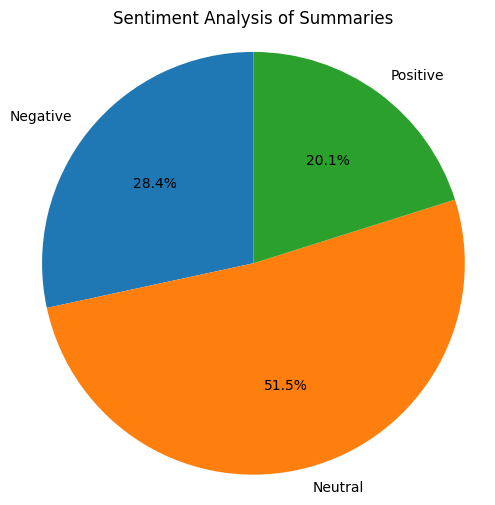

In [ ]:
import torch
import matplotlib.pyplot as plt

# 標籤列表
labels = ["Negative", "Neutral", "Positive"]

# 計數字典
sentiment_counts = {"Negative": 0, "Neutral": 0, "Positive": 0}

# 情感分析和計數
for summary in all_summaries:
    inputs = tokenizer(summary, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    sentiment_class = torch.argmax(logits).item()
    sentiment = labels[sentiment_class]
    sentiment_counts[sentiment] += 1

# 情感計數轉換為數值列表
count_values = list(sentiment_counts.values())

# 繪製圓餅圖
plt.figure(figsize=(6, 6))
plt.pie(count_values, labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Sentiment Analysis of Summaries")
plt.show()

In [ ]:
import torch

def calculate_sentiment_score(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    positive_score = probabilities[0, 2].item()  # 取得正面情感分數
    negative_score = probabilities[0, 0].item()  # 取得負面情感分數
    sentiment_score = positive_score - negative_score  # 計算情感分數：以0為中心的範圍，負值表示負面情感傾向，正值表示正面情感傾向，而接近0則表示中性或情感較為中立。
    return sentiment_score

# 儲存所有文本的情感分數
sentiment_scores = []

# 逐一處理每個摘要並計算情感分數
for summary in all_summaries:
    sentiment_score = calculate_sentiment_score(summary)
    sentiment_scores.append(sentiment_score)

print("Sentiment_Score:", sentiment_scores)

Sentiment_Score: [0.3490084186196327, -0.4078575372695923, 0.8726582583039999, -0.6439323425292969, -0.3935546949505806, 0.5614510904997587, -0.09210552275180817, 0.8452192326076329, -0.3589956611394882, -0.4757569208741188, 0.6772207599133253, -0.16557978093624115, -0.7744426196441054, 0.9543662315700203, 0.4847896546125412, -0.547389006242156, -0.5216004699468613, -0.17965859174728394, 0.021074846386909485, -0.022400617599487305, 0.9529574572807178, 0.11402758955955505, 0.019192375242710114, 0.557094010990113, -0.28365497291088104, -0.2078312635421753, -0.197524756193161, 0.9490437601925805, 0.3946036659181118, 0.9723196203121915, 0.7062854962423444, 0.030566759407520294, -0.29202036559581757, 0.5350205898284912, -0.7365428619086742, 0.3237263299524784, 0.31430619582533836, -0.004709891974925995, 0.3111250773072243, 0.14447279274463654, 0.4196579232811928, -0.37993935495615005, 0.016019277274608612, 0.4677017703652382, -0.7520485799759626, 0.2520388513803482, -0.7807884905487299, -0.

In [ ]:
import pandas as pd

# 建立空的資料框架用於儲存摘要、主題和情感分數
df = pd.DataFrame(columns=["Topic", "Summary", "Sentiment Score"])

# 逐一處理每個摘要並計算情感分數
for topic, summary in zip(topic_list, all_summaries):
    sentiment_score = calculate_sentiment_score(summary)
    df = df.append({"Topic": topic, "Summary": summary, "Sentiment Score": sentiment_score}, ignore_index=True)

# 儲存為 CSV 檔案
csv_file = "/content/drive/My Drive/Colab Notebooks/ted_data/sentiment_scores.csv"
df.to_csv(csv_file, index=False)

print("Sentiment_Score is saved", csv_file)

Sentiment_Score is saved /content/drive/My Drive/Colab Notebooks/ted_data/sentiment_scores.csv


# Method 6: OpenAI Cosine Similarity

功能6: 給VIP的功能: 優化相似影片推薦

In [ ]:
!pip install --upgrade openai
!pip3 install tiktoken

import openai
openai.organization = ""
openai.api_key = ""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from openai.embeddings_utils import get_embedding

import tiktoken
import pandas as pd

In [ ]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [ ]:
encoding = tiktoken.get_encoding(embedding_encoding)

In [ ]:
MAX_SECTION_LEN = 8000 # (maximum token sizes)
SEPARATOR = "\n* "
test_sentence0 = norm_transcripts_list[0]

ENCODING = "cl100k_base"  # Specify how text is converted into tokens. Different models use different encodings for gpt-4, gpt-3.5-turbo, text-embedding-ada-002

# encoding = tiktoken.get_encoding(ENCODING) # Set the encoding model by encoding name
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo") # Use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.
tokens_list = encoding.encode(test_sentence0) # Turn text into tokens
tokens_list_text = [encoding.decode_single_token_bytes(token) for token in tokens_list] # Converts a single integer token to the bytes it represents.

separator_len = len(tokens_list_text)

f"Context separator contains {separator_len} tokens, tokens are {tokens_list_text}"

'Context separator contains 849 tokens, tokens are [b\'Its\', b\' April\', b\' \', b\'10\', b\'th\', b\',\', b\' \', b\'181\', b\'5\', b\',and\', b\' in\', b\' just\', b\' a\', b\' few\', b\' moments\', b\',\', b\' the\', b\' sun\', b\' is\', b\' going\', b\' to\', b\' disappear\', b\'.\', b\' On\', b\' an\', b\' island\', b\' in\', b\' present\', b\'-day\', b\' Indonesia\', b\',\', b\' Mount\', b\' Tamb\', b\'ora\', b\' erupt\', b\'s\', b\' with\', b\' a\', b\' boom\', b\' that\', b\' can\', b\' be\', b\' heard\', b\' over\', b\' \', b\'2\', b\',\', b\'000\', b\' kilometers\', b\' away\', b\'.\', b\' S\', b\'ulf\', b\'urous\', b\' pl\', b\'umes\', b\' of\', b\' steam\', b\' and\', b\' ash\', b\' bill\', b\'ow\', b\' thousands\', b\' of\', b\' meters\', b\' into\', b\' the\', b\' sky\', b\',\', b\' forming\', b\' dark\', b\' storm\', b\' clouds\', b\' of\', b\' so\', b\'ot\', b\' and\', b\' lightning\', b\'.\', b\' This\', b\' eruption\', b\' will\', b\' go\', b\' down\', b\' as\', b\'

In [ ]:
_data_dict = {
    "topic": topic_list,
    "transcripts" : norm_transcripts_list,
    "url": url_list,
    "date": date_list
    # "timestamp": timestamp_map_list
}
ted_df = pd.DataFrame(_data_dict)

In [ ]:
ted_df2 = ted_df.copy(deep=True)

In [ ]:
def _f(x):
  return len(encoding.encode(x))

# _f = lambda x: len(encoding.encode(x))

ted_df2["n_tokens"] = ted_df2.transcripts.apply(_f)
len(ted_df2)

1853

In [ ]:
ted_df2

,topic,transcripts,url,date,n_tokens
0,The year without summer,"Its April 10th, 1815,and in just a few moments...",https://www.ted.com/talks/david_biello_the_yea...,May 2023,849
1,3 ways your money can fight climate change,"OK, I'll give it to you straight -- we need at...",https://www.ted.com/talks/veronica_chau_3_ways...,May 2023,2488
2,What the world can learn from China's innovati...,So when I was born in China in the early 1980s...,https://www.ted.com/talks/keyu_jin_what_the_wo...,May 2023,2280
3,The urgent risks of runaway AI — and what to d...,Im here to talk about the possibility of globa...,https://www.ted.com/talks/gary_marcus_the_urge...,May 2023,3301
4,Why were there three popes at the same time?,"For almost two millennia, the Pope has been a ...",https://www.ted.com/talks/joelle_rollo_koster_...,May 2023,856
...,...,...,...,...,...
1848,"To find your perfect mate, think like an evolu...","Hi there. I could be wrong, but I think this t...",https://www.ted.com/talks/david_puts_to_find_y...,Feb 2019,2963
1849,The science of sex,"In fact, I'm a science disseminatorout of curi...",https://www.ted.com/talks/pere_estupinya_the_s...,Feb 2019,2725
1850,How we can start to heal the pain of racial di...,I want to share with you a moment in my life w...,https://www.ted.com/talks/ruby_sales_how_we_ca...,Feb 2019,2091
1851,How do ocean currents work?,"In 1992, a cargo ship carrying bath toysgot ca...",https://www.ted.com/talks/jennifer_verduin_how...,Jan 2019,779


The maximum context length for the OpenAI model is 8191 tokens, but some films > 8191 tokens.

In [ ]:
MAX_SECTION_LEN = 8000 # (maximum token sizes)
SEPARATOR = "\n* "
test_sentence1 = all_summaries[0]

ENCODING = "cl100k_base"  # Specify how text is converted into tokens. Different models use different encodings for gpt-4, gpt-3.5-turbo, text-embedding-ada-002

# encoding = tiktoken.get_encoding(ENCODING) # Set the encoding model by encoding name
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo") # Use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.
tokens_list = encoding.encode(test_sentence1) # Turn text into tokens
tokens_list_text = [encoding.decode_single_token_bytes(token) for token in tokens_list] # Converts a single integer token to the bytes it represents.

separator_len = len(tokens_list_text)

f"Context separator contains {separator_len} tokens, tokens are {tokens_list_text}"

"Context separator contains 76 tokens, tokens are [b'Some', b' scientists', b' are', b' interested', b' in', b' using', b' sulf', b'urous', b' haze', b' to', b' block', b' out', b' the', b' sun', b',', b' and', b' hopefully', b',', b' slow', b' the', b' effects', b' of', b' global', b' warming', b'.', b' This', b' is', b' one', b' of', b' many', b' proposals', b' in', b' the', b' realm', b' of', b' geo', b'engineering', b'.', b' Scientists', b' know', b' that', b' volcanic', b' eru', b'ptions', b' have', b' periodically', b' cooled', b' the', b' climate', b'.', b' Both', b' the', b' Pin', b'at', b'ubo', b' eruption', b' in', b' ', b'199', b'1', b' and', b' ', b'188', b'3', b'\\xe2\\x80\\xb2', b's', b' blast', b' of', b' Krak', b'ato', b'a', b' reduced', b' global', b' average', b' temperatures', b'.']"

In [ ]:
_summary_dict = {
    "topic": topic_list,
    "summary" : all_summaries,
    "url": url_list,
    "date": date_list
    # "timestamp": timestamp_map_list
}
ted_df_summary = pd.DataFrame(_summary_dict)

In [ ]:
ted_df_summary2 = ted_df_summary.copy(deep=True)

In [ ]:
def _f(x):
  return len(encoding.encode(x))

# _f = lambda x: len(encoding.encode(x))

ted_df_summary2["n_tokens"] = ted_df_summary2.summary.apply(_f)
len(ted_df_summary2)

1853

In [ ]:
ted_df_summary2

,topic,summary,url,date,n_tokens
0,The year without summer,Some scientists are interested in using sulfur...,https://www.ted.com/talks/david_biello_the_yea...,May 2023,76
1,3 ways your money can fight climate change,We need at least four trillion dollars per yea...,https://www.ted.com/talks/veronica_chau_3_ways...,May 2023,65
2,What the world can learn from China's innovati...,"China has turned into a country of abundance, ...",https://www.ted.com/talks/keyu_jin_what_the_wo...,May 2023,68
3,The urgent risks of runaway AI — and what to d...,"Ilyse Hogue: I love AI, but right now I'm worr...",https://www.ted.com/talks/gary_marcus_the_urge...,May 2023,68
4,Why were there three popes at the same time?,"In the late 14th century,Catholics found thems...",https://www.ted.com/talks/joelle_rollo_koster_...,May 2023,69
...,...,...,...,...,...
1848,"To find your perfect mate, think like an evolu...",Human mating has all the hallmarks of a specie...,https://www.ted.com/talks/david_puts_to_find_y...,Feb 2019,79
1849,The science of sex,Scientist says 40 percent of men and more than...,https://www.ted.com/talks/pere_estupinya_the_s...,Feb 2019,68
1850,How we can start to heal the pain of racial di...,"When she was 17 years old, Coretta Scott King ...",https://www.ted.com/talks/ruby_sales_how_we_ca...,Feb 2019,60
1851,How do ocean currents work?,Ocean currents fall into two main categories: ...,https://www.ted.com/talks/jennifer_verduin_how...,Jan 2019,71


##注意:這裡開始要$$

In [ ]:
from openai.embeddings_utils import get_embedding, cosine_similarity

In [ ]:
# 對 ted_df_summary2 dataframe 進行嵌入操作
ted_df_summary2["embedding"] = ted_df_summary2.summary.apply(lambda x: get_embedding(x, engine=embedding_model))

In [ ]:
## save summary embedding
ted_df_summary2_embd_filename = "/content/drive/My Drive/Colab Notebooks/ted_data/ted_df_summary2_embd.json"
ted_df_summary2_data_json = ted_df_summary2.to_json()
with open(ted_df_summary2_embd_filename, "w") as f:
  f.write(ted_df_summary2_data_json)

In [ ]:
import pandas as pd
## load summary embedding
ted_df_summary2_embd_filename = "/content/drive/My Drive/Colab Notebooks/ted_data/ted_df_summary2_embd.json"
with open(ted_df_summary2_embd_filename, "r") as f:
  ted_df_summary2 = pd.read_json(f.read())

In [ ]:
ted_df_summary2

,topic,summary,url,date,n_tokens,embedding
0,The year without summer,Some scientists are interested in using sulfur...,https://www.ted.com/talks/david_biello_the_yea...,2023-05-01,76,"[-0.0043184464, 0.0152889099, 0.0256156288, -0..."
1,3 ways your money can fight climate change,We need at least four trillion dollars per yea...,https://www.ted.com/talks/veronica_chau_3_ways...,2023-05-01,65,"[-0.008760028500000001, -0.0290464107, 0.01293..."
2,What the world can learn from China's innovati...,"China has turned into a country of abundance, ...",https://www.ted.com/talks/keyu_jin_what_the_wo...,2023-05-01,68,"[0.0058317743, -0.0229385346, 0.0175790638, -0..."
3,The urgent risks of runaway AI — and what to d...,"Ilyse Hogue: I love AI, but right now I'm worr...",https://www.ted.com/talks/gary_marcus_the_urge...,2023-05-01,68,"[-0.0247792602, -0.0301908236, 0.010331165, -0..."
4,Why were there three popes at the same time?,"In the late 14th century,Catholics found thems...",https://www.ted.com/talks/joelle_rollo_koster_...,2023-05-01,69,"[0.0216180626, -0.0075631519000000005, -0.0006..."
...,...,...,...,...,...,...
1848,"To find your perfect mate, think like an evolu...",Human mating has all the hallmarks of a specie...,https://www.ted.com/talks/david_puts_to_find_y...,2019-02-01,79,"[-0.0109603982, -0.023099470900000002, 0.00439..."
1849,The science of sex,Scientist says 40 percent of men and more than...,https://www.ted.com/talks/pere_estupinya_the_s...,2019-02-01,68,"[-0.0131968707, -0.0043321732, 0.0177096874, -..."
1850,How we can start to heal the pain of racial di...,"When she was 17 years old, Coretta Scott King ...",https://www.ted.com/talks/ruby_sales_how_we_ca...,2019-02-01,60,"[-0.015131875900000001, -0.0284669213, 0.01260..."
1851,How do ocean currents work?,Ocean currents fall into two main categories: ...,https://www.ted.com/talks/jennifer_verduin_how...,2019-01-01,71,"[-0.0015074110000000002, 0.0031291882000000003..."


### Cosine_similarity of each Summary

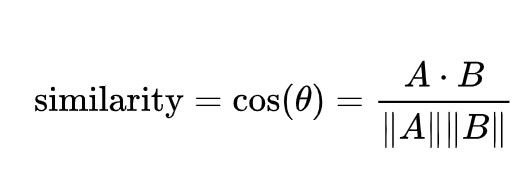

In [ ]:
def calculate_ted_similarity(ted_df_summary2):
  ## use embedding to calculate similarity
  ## output is nxn matrix which means cosine similarity for each topic pair
  emb = np.array(ted_df_summary2["embedding"].tolist())
  n,c = emb.shape
  print("Process {} data of {} dimension".format(n, c))
  emb_norm = np.sqrt( np.square(emb).sum(axis=1)).reshape(n,1)
  emb_norm_matrix = emb_norm@emb_norm.T #第i,j向量的長度積

  dot_scalar_matrix = emb@emb.T #矩陣相乘=各自向量的內積

  ted_emb_cosine_similarity = dot_scalar_matrix/emb_norm_matrix
  return ted_emb_cosine_similarity

In [ ]:
ted_topic_similarity = calculate_ted_similarity(ted_df_summary2)
print(ted_topic_similarity.shape)

Process 1853 data of 1536 dimension
(1853, 1853)


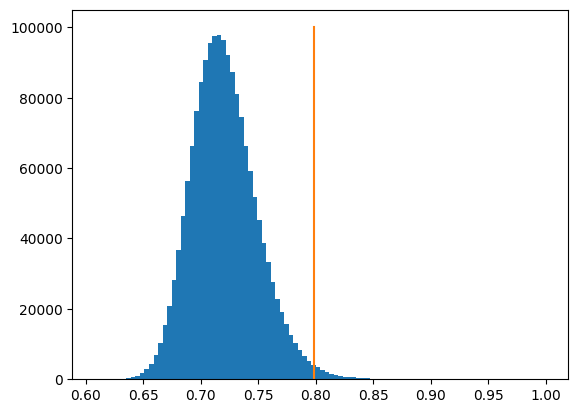

In [ ]:
collect_value = []
for i in range(ted_topic_similarity.shape[0]):
  for j in range(i+1, ted_topic_similarity.shape[0]):
    collect_value.append(ted_topic_similarity[i,j])

_thres = np.percentile(collect_value, 99)
ted_topic_relation = ted_topic_similarity > _thres
ted_topic_relation = ted_topic_relation.astype(np.int8)

plt.hist(collect_value, bins=100)
plt.plot([_thres, _thres], [0,100000])
plt.show()

In [ ]:
## write topic
topic_neo4j_file = "/content/drive/My Drive/Colab Notebooks/ted_data/topic_neo4j_file.csv"
topic_relation_neo4j_file = "/content/drive/My Drive/Colab Notebooks/ted_data/topic_relation_neo4j_file.csv"
with open(topic_neo4j_file, "w") as f:
  f.write("id, topic\n")
  s = []
  for i, _t in enumerate(ted_df_summary2["topic"].values, 1):
    s.append("{0:d},{1:s}".format(i, _t.replace(",", " ").replace("\"", "")))
  f.write("\n".join(s))

with open(topic_relation_neo4j_file, "w") as f:
  f.write("id_from,id_to\n")
  s = []
  for i in range(ted_topic_similarity.shape[0]):
    for j in range(i+1, ted_topic_similarity.shape[0]):
      if ted_topic_similarity[i,j] > _thres:
        s.append("{0:d},{1:d}".format(i+1, j+1))
  f.write("\n".join(s))

In [ ]:
topicname_relation_neo4j_file = "/content/drive/My Drive/Colab Notebooks/ted_data/topicname_relation_neo4j_file.csv"
_topics = ted_df_summary2["topic"].values
with open(topicname_relation_neo4j_file, "w") as f:
    f.write("id_from,id_to\n")
    s = []
    for i in range(ted_topic_similarity.shape[0]):
        for j in range(i+1, ted_topic_similarity.shape[0]):
            if ted_topic_similarity[i,j] > _thres:
                s1 = _topics[i].replace(",", " ").replace("\"", "")
                s2 = _topics[j].replace(",", " ").replace("\"", "")
                s.append("{0:s},{1:s}".format(s1, s2))
    f.write("\n".join(s))

# Method 7: Q&A with chatgpt 3.5 (gpt-3.5-turbo)

功能7: 給VIP的功能: 優化Q&A

In [ ]:
#MY_LANG = "English"
MY_LANG = "繁體中文"
#MY_LANG = "Bahasa Indonesia"
#MY_LANG = "vietnamese" # or "Tiếng Việt"

In [ ]:
# search through the reviews for a specific product
def search_reviews(mydf , product_description, n=3, pprint=True):
  # 建立tmpdf為mydf的複製，以免改變原始資料
  tmpdf = mydf.copy(deep=True)
  # 取得產品的嵌入向量
  product_embedding = get_embedding(
    product_description,
    engine="text-embedding-ada-002"
  )
  tmpdf["similarity"] = tmpdf.embedding.apply(lambda x: cosine_similarity(x, product_embedding))

  # 以相似度排序並選取前n個transcripts欄位
  results = (
    tmpdf.sort_values("similarity", ascending=False)
      .head(n)
      .transcripts
  )

  return results

In [ ]:
def construct_prompt(question: str, df: pd.DataFrame, mylang: str) -> str:
    """
    Fetch relevant
    """
    most_relevant_document_sections = search_reviews(df,question)

    chosen_sections = []
    chosen_sections_len = 0
    chosen_sections_indexes = []

    for section_index in most_relevant_document_sections:
        # Add contexts until we run out of space.
        document_section = df.loc[df['topic'] == section_index]

        chosen_sections_len += document_section.n_tokens.item() + separator_len

        if chosen_sections_len > MAX_SECTION_LEN:
            break

        chosen_sections.append(SEPARATOR + document_section.topic.item().replace("\r\n", " ").replace("\n"," ") + ". " + document_section.transcripts.item().replace("\r\n", " ")+ document_section.url.item().replace("\r\n", " "))
        chosen_sections_indexes.append((section_index))

    header = f"""Please answer the question truthfully based on the following context. Please provide "abstracts" and list "topic" and "url" at the end.  \n\nContext: \n"""

    return header + "".join(chosen_sections) + "\n\n Q: " + question + "\n" + f"Please reply in {mylang}\n" + "A: Let's think step by step."

In [ ]:
import pandas as pd
## load summary embedding
ted_df_summary2_embd_filename = "/content/drive/My Drive/Colab Notebooks/ted_data/ted_df_summary2_embd.json"
with open(ted_df_summary2_embd_filename, "r") as f:
  ted_df_summary2 = pd.read_json(f.read())

In [ ]:
ted_df_summary2

,topic,summary,url,date,n_tokens,embedding
0,The year without summer,Some scientists are interested in using sulfur...,https://www.ted.com/talks/david_biello_the_yea...,2023-05-01,76,"[-0.0043184464, 0.0152889099, 0.0256156288, -0..."
1,3 ways your money can fight climate change,We need at least four trillion dollars per yea...,https://www.ted.com/talks/veronica_chau_3_ways...,2023-05-01,65,"[-0.008760028500000001, -0.0290464107, 0.01293..."
2,What the world can learn from China's innovati...,"China has turned into a country of abundance, ...",https://www.ted.com/talks/keyu_jin_what_the_wo...,2023-05-01,68,"[0.0058317743, -0.0229385346, 0.0175790638, -0..."
3,The urgent risks of runaway AI — and what to d...,"Ilyse Hogue: I love AI, but right now I'm worr...",https://www.ted.com/talks/gary_marcus_the_urge...,2023-05-01,68,"[-0.0247792602, -0.0301908236, 0.010331165, -0..."
4,Why were there three popes at the same time?,"In the late 14th century,Catholics found thems...",https://www.ted.com/talks/joelle_rollo_koster_...,2023-05-01,69,"[0.0216180626, -0.0075631519000000005, -0.0006..."
...,...,...,...,...,...,...
1848,"To find your perfect mate, think like an evolu...",Human mating has all the hallmarks of a specie...,https://www.ted.com/talks/david_puts_to_find_y...,2019-02-01,79,"[-0.0109603982, -0.023099470900000002, 0.00439..."
1849,The science of sex,Scientist says 40 percent of men and more than...,https://www.ted.com/talks/pere_estupinya_the_s...,2019-02-01,68,"[-0.0131968707, -0.0043321732, 0.0177096874, -..."
1850,How we can start to heal the pain of racial di...,"When she was 17 years old, Coretta Scott King ...",https://www.ted.com/talks/ruby_sales_how_we_ca...,2019-02-01,60,"[-0.015131875900000001, -0.0284669213, 0.01260..."
1851,How do ocean currents work?,Ocean currents fall into two main categories: ...,https://www.ted.com/talks/jennifer_verduin_how...,2019-01-01,71,"[-0.0015074110000000002, 0.0031291882000000003..."


In [ ]:
prompt = construct_prompt("Is there any AI-related film?", ted_df_summary2, MY_LANG)

ValueError: ignored

In [ ]:
prompt

In [ ]:
def askTed(question: str, df: pd.DataFrame):
#  mylang = detectlang(question)
  prompt = construct_prompt(question,df,MY_LANG)

  completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    temperature = 0.0,
    messages=[
    {'role':'user','content': prompt},
  ])

  itext = (
      completion["choices"][0]
      .get("message")
      .get("content")
      .encode("utf8")
      .decode()
    )
  return itext

In [ ]:
print(askTed("有AI相關的影片嗎?",ted_df2))